In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("BreadBasket_DMS.csv")
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


# Extracting Year, Month, Day, Hour, and Minute to Seprarate columns

In [2]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day
df['hour'] = pd.DatetimeIndex(df['Time']).hour
df['minute'] = pd.DatetimeIndex(df['Time']).minute
df.head()

,Date,Time,Transaction,Item,year,month,day,hour,minute
0,2016-10-30,09:58:11,1,Bread,2016,10,30,9,58
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30,10,7
4,2016-10-30,10:07:57,3,Jam,2016,10,30,10,7


# Normalization Process

In [12]:
df_Normalized = df.groupby(['Transaction', 'year', 'month', 'day', 'hour', 'minute'])['Item'].count().reset_index()
df_Normalized.head(20)

,Transaction,year,month,day,hour,minute,Item
0,1,2016,10,30,9,58,1
1,2,2016,10,30,10,5,2
2,3,2016,10,30,10,7,3
3,4,2016,10,30,10,8,1
4,5,2016,10,30,10,13,3
5,6,2016,10,30,10,16,3
6,7,2016,10,30,10,19,4
7,8,2016,10,30,10,20,2
8,9,2016,10,30,10,21,2
9,10,2016,10,30,10,25,2


### Total Number of transactions provided

In [15]:
df_Normalized.count()

Transaction    9531
year           9531
month          9531
day            9531
hour           9531
minute         9531
Item           9531
dtype: int64

In [16]:
df_Normalized.tail()

,Transaction,year,month,day,hour,minute,Item
9526,9680,2017,4,9,14,24,1
9527,9681,2017,4,9,14,30,4
9528,9682,2017,4,9,14,32,4
9529,9683,2017,4,9,14,57,2
9530,9684,2017,4,9,15,4,1


## Graphs based on Months and number of Transactions

In [17]:
import seaborn as sns

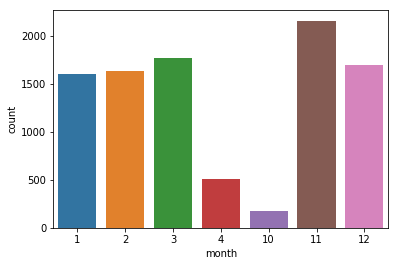

In [18]:
sns.countplot(data=df_Normalized, x="month")

### Comparing it with the number of items graphs

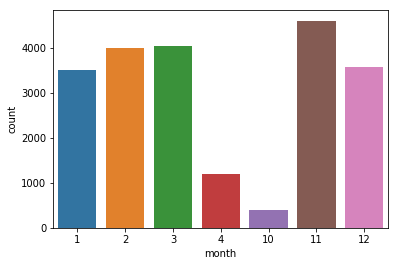

In [19]:
sns.countplot(data=df, x="month")

Monstly number of items depict number of transactions per month except for the Fabruary where more items are bought but in lesser transactions.

We will be doing same comparisons for other graphs as well

## Transaction by Hour on any given day

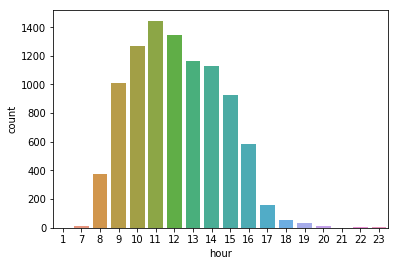

In [21]:
sns.countplot(data=df_Normalized, x="hour")

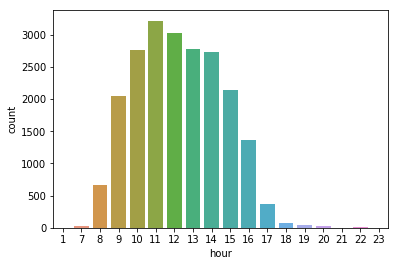

In [22]:
sns.countplot(data=df, x="hour")

#### Result: Transactions done between 1 and 3 pm has most items

# Heatmaps

### Between Items and Hours

#### Data Preparation

In [29]:
df_ItemHour = df.groupby(['hour', 'Item'])['Transaction'].count().reset_index()
df_ItemHour.head(10)

,hour,Item,Transaction
0,1,Bread,1
1,7,Bread,2
2,7,Coffee,13
3,7,Medialuna,6
4,7,NONE,1
5,7,Pastry,2
6,7,Toast,1
7,8,Afternoon with the baker,3
8,8,Alfajores,4
9,8,Argentina Night,2


In [111]:
df_ItemHour_Pivot = df_ItemHour.pivot(index='Item', columns='hour', values='Transaction')
df_ItemHour_Pivot = df_ItemHour_Pivot.fillna(0)
df_ItemHour_Pivot.tail(60)

hour,1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Item,,,,,,,,,,,,,,,,,,
Extra Salami or Feta,0.0,0.0,0.0,3.0,1.0,7.0,4.0,7.0,14.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Fairy Doors,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Farm House,0.0,0.0,13.0,64.0,55.0,78.0,58.0,37.0,21.0,25.0,14.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0
Focaccia,0.0,0.0,0.0,5.0,9.0,6.0,6.0,13.0,5.0,1.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
Frittata,0.0,0.0,0.0,0.0,3.0,2.0,17.0,27.0,18.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fudge,0.0,0.0,2.0,12.0,20.0,20.0,23.0,17.0,33.0,11.0,6.0,9.0,4.0,1.0,1.0,0.0,0.0,0.0
Gift voucher,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gingerbread syrup,0.0,0.0,1.0,0.0,1.0,3.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Granola,0.0,0.0,1.0,4.0,8.0,4.0,5.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### The Heatpmap

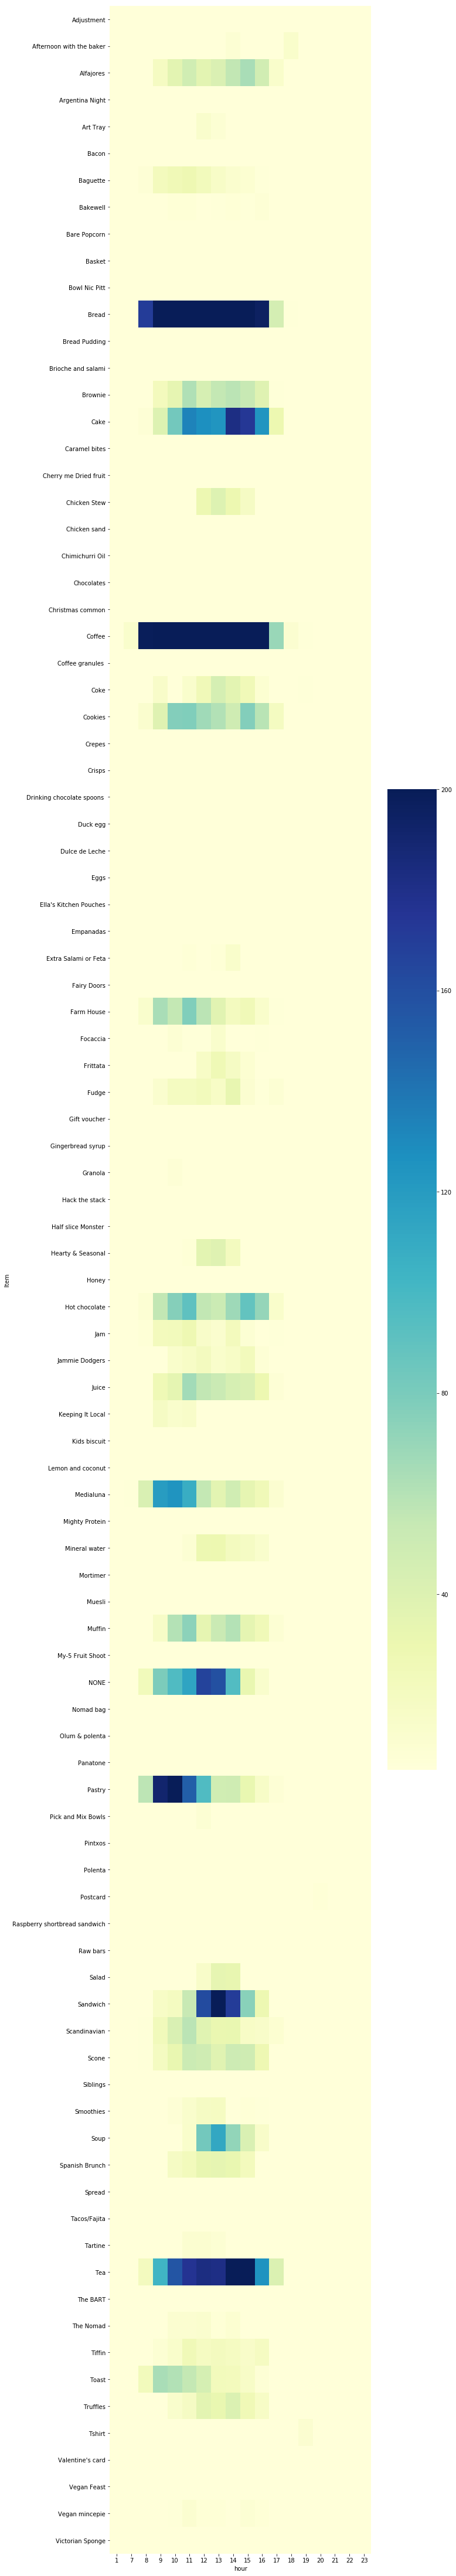

In [43]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,80))
sns.heatmap(df_ItemHour_Pivot, vmin=5, vmax=200, yticklabels=True, ax=ax, cmap="YlGnBu")

#### Since in the above graph we can see most of the items are not sold frequently, lets focus on items that are frequent in transactions

##### Data Preparation

In [128]:
df_ItemHour_Focused = df_ItemHour_Pivot.drop(['Adjustment', 'Afternoon with the baker', 'Argentina Night', 'Art Tray', 'Bacon', 'Bakewell', 'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread Pudding', 'Brioche and salami', 'Caramel bites', 'Cherry me Dried fruit', 'Chicken sand', 'Chimichurri Oil', 'Chocolates', 'Christmas common','Crepes', 'Crisps', 'Duck egg', 'Dulce de Leche', 'Eggs', 'Empanadas', 'Fairy Doors', 'Gift voucher', 'Gingerbread syrup', 'Granola', 'Hack the stack', 'Honey', 'Kids biscuit', 'Lemon and coconut', 'Mighty Protein', 'Mortimer', 'Muesli', 'My-5 Fruit Shoot', 'Nomad bag', 'Olum & polenta', 'Panatone', 'Pick and Mix Bowls', 'Pintxos', 'Polenta', 'Postcard', 'Raspberry shortbread sandwich', 'Raw bars', 'Siblings', 'Spread', 'Tacos/Fajita', 'Tartine', 'The BART', 'Tshirt', 'Valentine\'s card', 'Vegan Feast', 'Victorian Sponge'])
df_ItemHour_Focused

hour,1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Item,,,,,,,,,,,,,,,,,,
Alfajores,0.0,0.0,4.0,19.0,36.0,48.0,36.0,42.0,56.0,64.0,47.0,14.0,3.0,0.0,0.0,0.0,0.0,0.0
Baguette,0.0,0.0,8.0,22.0,26.0,28.0,23.0,16.0,12.0,10.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Bread,1.0,2.0,171.0,400.0,508.0,528.0,474.0,340.0,341.0,310.0,196.0,46.0,6.0,2.0,0.0,0.0,0.0,0.0
Brownie,0.0,0.0,5.0,22.0,34.0,62.0,44.0,55.0,58.0,53.0,39.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0
Cake,0.0,0.0,8.0,40.0,83.0,133.0,127.0,124.0,182.0,174.0,124.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
Chicken Stew,0.0,0.0,0.0,0.0,0.0,2.0,29.0,40.0,30.0,18.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Coffee,0.0,13.0,199.0,583.0,820.0,946.0,740.0,607.0,636.0,519.0,321.0,69.0,11.0,6.0,1.0,0.0,0.0,0.0
Coffee granules,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Coke,0.0,0.0,1.0,15.0,3.0,13.0,25.0,45.0,36.0,25.0,10.0,5.0,0.0,6.0,1.0,0.0,0.0,0.0


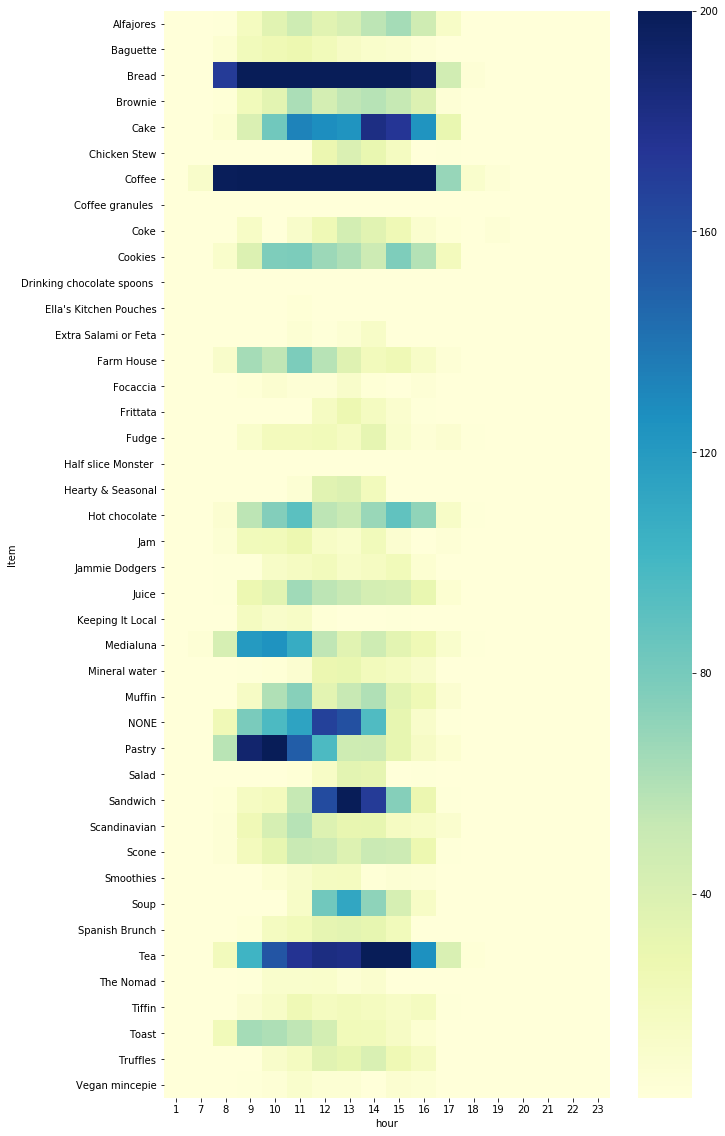

In [132]:
fig,ax=plt.subplots(figsize=(10,20))
sns.heatmap(df_ItemHour_Focused, vmin=3, vmax=200, yticklabels=True, ax=ax, cmap="YlGnBu")

### Between Items and Day of Month

#### Data Preparation 

In [133]:
df_ItemDay = df.groupby(['day', 'Item'])['Transaction'].count().reset_index()
df_ItemDay.head(10)

,day,Item,Transaction
0,1,Alfajores,14
1,1,Baguette,8
2,1,Bakewell,1
3,1,Bread,124
4,1,Brownie,6
5,1,Cake,34
6,1,Chicken Stew,7
7,1,Coffee,155
8,1,Coffee granules,1
9,1,Coke,9


In [134]:
df_ItemDay_Pivot = df_ItemDay.pivot(index='Item', columns='day', values='Transaction')
df_ItemDay_Pivot = df_ItemDay_Pivot.fillna(0)
df_ItemDay_Focused = df_ItemDay_Pivot.drop(['Adjustment', 'Afternoon with the baker', 'Argentina Night', 'Art Tray', 'Bacon', 'Bakewell', 'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread Pudding', 'Brioche and salami', 'Caramel bites', 'Cherry me Dried fruit', 'Chicken sand', 'Chimichurri Oil', 'Chocolates', 'Christmas common','Crepes', 'Crisps', 'Duck egg', 'Dulce de Leche', 'Eggs', 'Empanadas', 'Fairy Doors', 'Gift voucher', 'Gingerbread syrup', 'Granola', 'Hack the stack', 'Honey', 'Kids biscuit', 'Lemon and coconut', 'Mighty Protein', 'Mortimer', 'Muesli', 'My-5 Fruit Shoot', 'Nomad bag', 'Olum & polenta', 'Panatone', 'Pick and Mix Bowls', 'Pintxos', 'Polenta', 'Postcard', 'Raspberry shortbread sandwich', 'Raw bars', 'Siblings', 'Spread', 'Tacos/Fajita', 'Tartine', 'The BART', 'Tshirt', 'Valentine\'s card', 'Vegan Feast', 'Victorian Sponge'])
df_ItemDay_Focused

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Item,,,,,,,,,,,,,,,,,,,,,
Alfajores,14.0,17.0,21.0,15.0,16.0,25.0,14.0,19.0,8.0,10.0,...,14.0,4.0,8.0,9.0,11.0,4.0,3.0,2.0,3.0,2.0
Baguette,8.0,3.0,2.0,9.0,4.0,2.0,6.0,7.0,5.0,3.0,...,3.0,4.0,5.0,7.0,8.0,1.0,10.0,5.0,3.0,6.0
Bread,124.0,96.0,139.0,149.0,129.0,118.0,131.0,104.0,93.0,123.0,...,95.0,83.0,111.0,107.0,94.0,62.0,118.0,91.0,100.0,94.0
Brownie,6.0,2.0,8.0,39.0,37.0,8.0,3.0,18.0,13.0,14.0,...,16.0,16.0,13.0,7.0,8.0,11.0,8.0,3.0,0.0,8.0
Cake,34.0,37.0,42.0,55.0,40.0,32.0,30.0,34.0,25.0,29.0,...,38.0,42.0,39.0,43.0,39.0,15.0,24.0,24.0,25.0,22.0
Chicken Stew,7.0,3.0,3.0,6.0,3.0,3.0,7.0,4.0,5.0,4.0,...,2.0,8.0,8.0,3.0,3.0,6.0,2.0,3.0,2.0,3.0
Coffee,155.0,159.0,226.0,281.0,260.0,200.0,208.0,177.0,159.0,166.0,...,149.0,145.0,176.0,150.0,165.0,168.0,184.0,128.0,140.0,157.0
Coffee granules,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
Coke,9.0,7.0,4.0,12.0,9.0,5.0,10.0,3.0,8.0,6.0,...,6.0,4.0,7.0,10.0,4.0,5.0,6.0,4.0,3.0,10.0


#### Graph

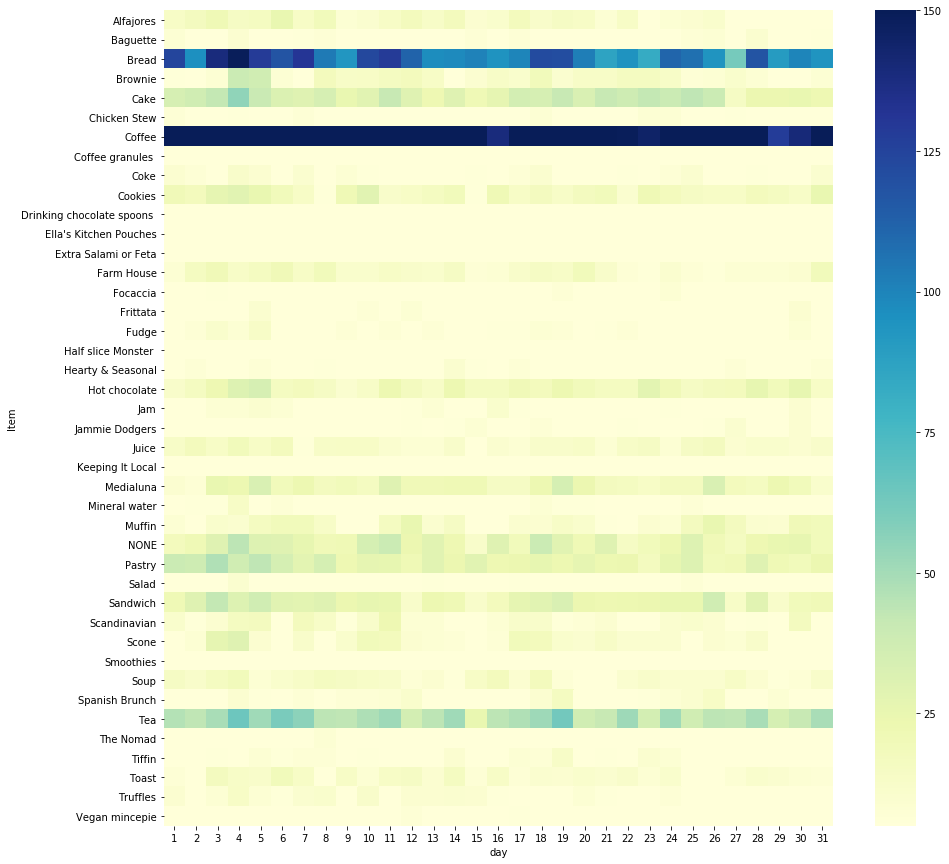

In [138]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df_ItemDay_Focused, vmin=5, vmax=150, yticklabels=True, ax=ax, cmap="YlGnBu")

### Heatmap between Day of Week and Items

#### Data Preparation

#### First Step is to make Extract Day of Week from Date Column 

In [139]:
df['my_dates'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['my_dates'].dt.weekday_name
df.head(10)

,Date,Time,Transaction,Item,year,month,day,hour,minute,my_dates,day_of_week
0,2016-10-30,09:58:11,1,Bread,2016,10,30,9,58,2016-10-30,Sunday
1,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5,2016-10-30,Sunday
2,2016-10-30,10:05:34,2,Scandinavian,2016,10,30,10,5,2016-10-30,Sunday
3,2016-10-30,10:07:57,3,Hot chocolate,2016,10,30,10,7,2016-10-30,Sunday
4,2016-10-30,10:07:57,3,Jam,2016,10,30,10,7,2016-10-30,Sunday
5,2016-10-30,10:07:57,3,Cookies,2016,10,30,10,7,2016-10-30,Sunday
6,2016-10-30,10:08:41,4,Muffin,2016,10,30,10,8,2016-10-30,Sunday
7,2016-10-30,10:13:03,5,Coffee,2016,10,30,10,13,2016-10-30,Sunday
8,2016-10-30,10:13:03,5,Pastry,2016,10,30,10,13,2016-10-30,Sunday
9,2016-10-30,10:13:03,5,Bread,2016,10,30,10,13,2016-10-30,Sunday


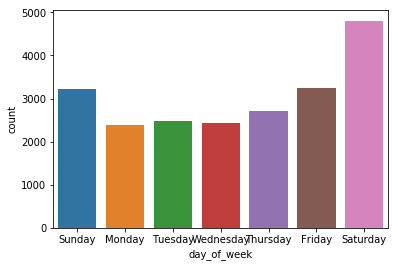

In [140]:
sns.countplot(data=df, x="day_of_week")

#### Make Pivots for Heatmap

In [142]:
df_ItemDayOfWeek = df.groupby(['day_of_week', 'Item'])['Transaction'].count().reset_index()
df_ItemDayOfWeek.head(10)

,day_of_week,Item,Transaction
0,Friday,Afternoon with the baker,7
1,Friday,Alfajores,59
2,Friday,Art Tray,4
3,Friday,Baguette,21
4,Friday,Bakewell,3
5,Friday,Bread,527
6,Friday,Brioche and salami,1
7,Friday,Brownie,78
8,Friday,Cake,120
9,Friday,Chicken Stew,21


In [149]:
df_ItemDayOfWeek_Pivot = df_ItemDayOfWeek.pivot(index='Item', columns='day_of_week', values='Transaction')
df_ItemDayOfWeek_Pivot = df_ItemDayOfWeek_Pivot.fillna(0)
df_ItemDayOfWeek_Focused = df_ItemDayOfWeek_Pivot.drop(['Adjustment', 'Afternoon with the baker', 'Argentina Night', 'Art Tray', 'Bacon', 'Bakewell', 'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread Pudding', 'Brioche and salami', 'Caramel bites', 'Cherry me Dried fruit', 'Chicken sand', 'Chimichurri Oil', 'Chocolates', 'Christmas common','Crepes', 'Crisps', 'Duck egg', 'Dulce de Leche', 'Eggs', 'Empanadas', 'Fairy Doors', 'Gift voucher', 'Gingerbread syrup', 'Granola', 'Hack the stack', 'Honey', 'Kids biscuit', 'Lemon and coconut', 'Mighty Protein', 'Mortimer', 'Muesli', 'My-5 Fruit Shoot', 'Nomad bag', 'Olum & polenta', 'Panatone', 'Pick and Mix Bowls', 'Pintxos', 'Polenta', 'Postcard', 'Raspberry shortbread sandwich', 'Raw bars', 'Siblings', 'Spread', 'Tacos/Fajita', 'Tartine', 'The BART', 'Tshirt', 'Valentine\'s card', 'Vegan Feast', 'Victorian Sponge'])
column_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_ItemDayOfWeek_Focused = df_ItemDayOfWeek_Focused.reindex(column_order, axis=1)
df_ItemDayOfWeek_Focused

day_of_week,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
Item,,,,,,,
Alfajores,70.0,32.0,43.0,41.0,57.0,59.0,67.0
Baguette,21.0,10.0,23.0,23.0,21.0,21.0,33.0
Bread,473.0,360.0,350.0,405.0,450.0,527.0,760.0
Brownie,61.0,24.0,23.0,30.0,52.0,78.0,111.0
Cake,167.0,89.0,139.0,123.0,141.0,120.0,246.0
Chicken Stew,8.0,13.0,19.0,14.0,26.0,21.0,22.0
Coffee,825.0,681.0,710.0,628.0,670.0,854.0,1103.0
Coffee granules,1.0,2.0,0.0,0.0,0.0,1.0,3.0
Coke,13.0,23.0,24.0,34.0,21.0,25.0,45.0


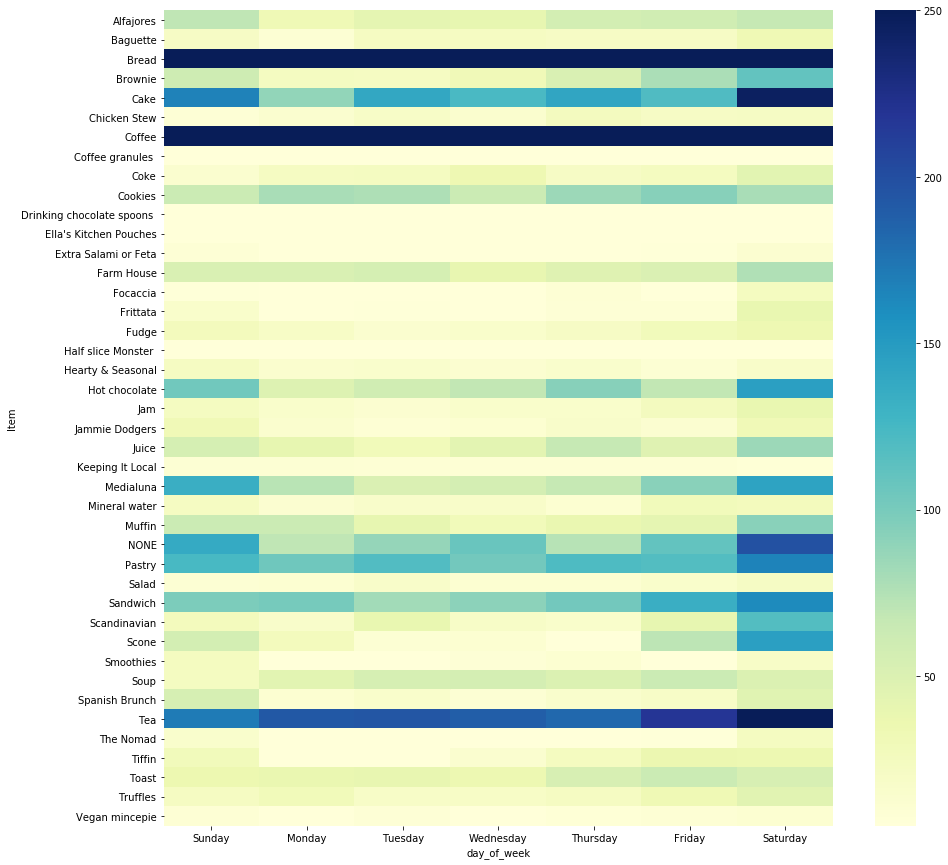

In [150]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df_ItemDayOfWeek_Focused, vmin=5, vmax=250, yticklabels=True, ax=ax, cmap="YlGnBu")